In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [2]:
data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=',')  

In [3]:
data_set[:10,0:16]

array([[ 1.  ,  2.88,  2.16,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         3.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 60.  ],
       [ 2.  ,  3.4 ,  1.88,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 51.  ],
       [ 2.  ,  2.76,  2.08,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 59.  ],
       [ 2.  ,  3.68,  3.04,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 54.  ],
       [ 2.  ,  2.44,  0.96,  2.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 73.  ],
       [ 2.  ,  2.48,  1.88,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 51.  ],
       [ 2.  ,  4.36,  3.28,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  , 59.  ],
       [ 1.  ,  3.19,  2.5 ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0. 

In [4]:
X = data_set[:,0:16]             # 요소가 16개인 데이터     (환자 상태의 기록)
Y = data_set[:,16]               # X의 결과 값 : label      (수술 1년 후 사망/생존 여부)

In [5]:
print(X.shape)
print(Y.shape)

(470, 16)
(470,)


In [4]:
model = Sequential()           # 모델 생성
model.add(Dense(30, input_dim=16, activation='relu'))          # 1층추가-16개의 입력층  
model.add(Dense(1, activation='sigmoid'))          # 입력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(X,Y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 7ms/step - loss: 0.4500 - accuracy: 0.8511
Epoch 2/5
30/30 [==============================] - 0s 5ms/step - loss: 0.4253 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8511


In [14]:
# 최소제곱법으로 단순선형회귀분석 모델 생성
import numpy as np
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

In [15]:
mean_x = np.mean(x) # x의 평균
mean_y = np.mean(y) # y의 평균
print(f"x의 평균값 : {mean_x}, y의 평균값 : {mean_y}")

x의 평균값 : 5.0, y의 평균값 : 90.5


In [17]:
# 기울기 공식 -> 합((x-x의 평균)(y-y의 평균)) / 합((x-x의 평균) 제곱)

divisor = sum([(i-mean_x)**2 for i in x])

top = 0
for i in range(len(x)):
    top += (x[i] - mean_x) * (y[i] - mean_y)
a = top / divisor
print('기울기:',a )

# 절편 b = y평균 - 기울기(a) * x평균
b = mean_y - a*mean_x
print('절편 b : ',b)

기울기: 2.3


In [19]:
pred_y = [a*i + b for i in x]
print(pred_y)

[83.6, 88.2, 92.8, 97.4]


In [13]:
import matplotlib.pyplot as plt

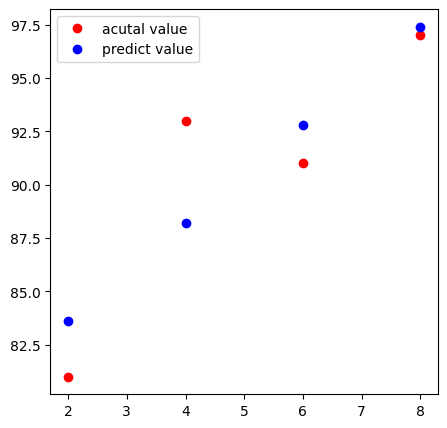

In [21]:
plt.figure(figsize=(5,5))

plt.plot(x,y, 'o', color ='red', label='acutal value')
plt.plot(x,pred_y, 'o', color ='blue', label= 'predict value')
plt.legend()
plt.show()

# 평균 제곱오차 (MSE) 구하기

In [26]:
# 기울기와 절편에 임의의 초기값 설정
fake_a = 3
fake_b= 76

# 공부 시간과 성적 배열 설정
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

def predict(x):
    return x * fake_a + fake_b

predict_result = [predict(i) for i in x]  # 예측값 생성
print(predict_result)

[82, 88, 94, 100]


In [28]:
# 평균 제곱 오차 결과 값 구함
mse_result = sum([ (y[i] - predict_result[i]) ** 2 for i in range(len(y))]) / len(y)
print('평균제곱오차 : ', mse_result)

평균제곱오차 :  11.0


In [32]:
for x_value, y_value, y_predict in zip(x,y, predict_result):
    print("공부시간 : {}, 실제점수 : {}, 예측점수 :{}".format(x_value, y_value, y_predict))

공부시간 : 2, 실제점수 : 81, 예측점수 :82
공부시간 : 4, 실제점수 : 93, 예측점수 :88
공부시간 : 6, 실제점수 : 91, 예측점수 :94
공부시간 : 8, 실제점수 : 97, 예측점수 :100


epocs : 0, 기울기 : 27.84, 절편 : 5.43
epocs : 100, 기울기 : 7.073858435872394, 절편 : 50.51166161138297
epocs : 200, 기울기 : 4.095999380762421, 절편 : 68.28224379060177
epocs : 300, 기울기 : 2.9756829100119027, 절편 : 74.96781336233505
epocs : 400, 기울기 : 2.5542024233262106, 절편 : 77.48302865233052
epocs : 500, 기울기 : 2.3956349066513707, 절편 : 78.42929177728175
epocs : 600, 기울기 : 2.3359793398132864, 절편 : 78.78529068727728
epocs : 700, 기울기 : 2.313535987420573, 절편 : 78.91922301600925
epocs : 800, 기울기 : 2.3050924490666174, 절편 : 78.96961044185792
epocs : 900, 기울기 : 2.3019158585694823, 절편 : 78.98856697541248
epocs : 1000, 기울기 : 2.3007207758016315, 절편 : 78.99569871827002
epocs : 1100, 기울기 : 2.300271167070735, 절편 : 78.99838179089187
epocs : 1200, 기울기 : 2.3001020172709508, 절편 : 78.9993912045567
epocs : 1300, 기울기 : 2.300038380484562, 절편 : 78.99977096168232
epocs : 1400, 기울기 : 2.3000144393354365, 절편 : 78.9999138322214
epocs : 1500, 기울기 : 2.3000054323026444, 절편 : 78.99996758234106
epocs : 1600, 기울기 : 2.300002043716771

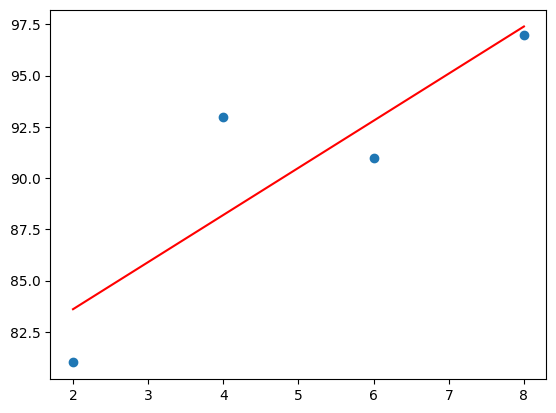

In [47]:
# 경사하강법으로 a와 b를 검색 : MSE가 최소가 되도록
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])
              
a = 0; b = 0 # 기울기와 절편을 0으로 초기화
lr = 0.03 # 학습률 설정
epochs = 2001 # 2001회 실행
n = len(x)
#경사하강법 실행
for i in range(epochs):
    y_pred=a * x + b   # 예측값 구함
    error = y - y_pred # 실제값과 예측값 차이 구함
    
    a_diff = (2/n) * sum(-x*(error))        # a로 편미분
    b_diff = (2/n) * sum(-(error))          # b로 편미분
    
    a = a- lr *a_diff          # 다음에 적용할 a 값 수정
    b=  b- lr *b_diff          # 다음에 적용할 b 값 수정
              
    if i % 100 == 0:
        print('epocs : {}, 기울기 : {}, 절편 : {}'.format(i, a, b))

# 최종 a 와 b를 적용하여서 y의 예측값 구함
y_pred = a *x +b

plt.scatter(x,y)
plt.plot(x,y_pred,'r')
plt.show()